# **INVENOTRY OF STEEL RODS**


**BUSINESS PROBLEM**: manually counting the number of steel rods is extremely time consuming process and also the count might be inaccurate

**BUSINESS OBJECTIVE**: minimize the counting time maximize:accuracy of inventory data

**CONSTRAINT**: minimize the manual effort

**BUSINESS SUCCESS CRITERIA**:Reduce the time taken for counting the rods by atleast 70%

**ML SUCCESS CRITERIA**:Achieve an accuracy of atleast 96%

**ECONOMIC SUCCESS CRITERIA**:Approximately save 25lakhs per annum,because of automating the counting of rods and reducing the error.

Use GPU Acceleration
If you are running this notebook in Google Colab, navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

**Steps in this Tutorial**:In this tutorial, we are going to cover:



*  Before you start
*  Install YOLOv8
*Preparing a custom dataset
*Custom Training
*Validate Custom Model
*Inference with Custom Model

In [ ]:
'''The NVIDIA System Management Interface (nvidia-smi) is a command line utility
that provides management and monitoring capabilities for NVIDIA GPUs and their drivers. '''
!nvidia-smi

Sat Jun 24 08:50:01 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Import Packages**

Ultralytics YOLOv8 is the latest version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics.

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 17.0 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.5 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=926da050f6702fbce5409333931c7eec502099aad62a95c385b4d6dcd2f97038
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pypar

**Data annotation** is the process of labeling individual elements of training data (whether text, images, audio, or video) to help machines understand what exactly is in it and what is important. This annotated data is then used for model training

**AUGUMENTATION**

Geometric transformations – you can randomly flip, crop, rotate or translate images, and that is just the tip of the iceberg. Color space transformations – change RGB color channels, intensify any color. Kernel filters – sharpen or blur an image.

**Preparing a custom dataset**

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="upclI1eGcbhbx5jxl1wv")
project = rf.workspace("360digitmg-vvros").project("inventory-of-steel-rods-um0a3")
dataset = project.version(9).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.121, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Inventory-of-Steel-rods-9 in yolov8:: 100%|██████████| 4378/4378 [00:02<00:00, 1880.99it/s]


# **YOLO (You Only Look Once)**

The YOLO architecture utilizes three primary terminologies to achieve its goal of object detection.

**Custom Training** **&** **Validate Custom Model**

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Inventory-of-Steel-rods-9/data.yaml epochs=5 imgsz=640 batch=4 project=/content/drive/MyDrive/yolov8m/training_results name=inventory_train

100% 49.7M/49.7M [00:00<00:00, 211MB/s]
Ultralytics YOLOv8.0.119 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Inventory-of-Steel-rods-9/data.yaml, epochs=5, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/yolov8m/training_results, name=inventory_train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, clas

**Inferencing On Images**

# **Inferencing On Images**

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt conf=0.55 source=/content/Inventory-of-Steel-rods-9/test/images save=True save_txt=True

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

image 1/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-115-_jpg.rf.6be1d46d77936559ae970154ea5eec49.jpg: 640x640 73 16 mms, 37.0ms
image 2/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-135-_jpg.rf.b2e4be7ec295eb70c8b06922b5bff09c.jpg: 640x640 62 16 mms, 37.0ms
image 3/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-145-_jpg.rf.467bf70f222a8ff993bdf54057c83586.jpg: 640x640 81 16 mms, 37.0ms
image 4/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-147-_jpg.rf.dfc8108998fafc164dae6ed2acae7eff.jpg: 640x640 81 16 mms, 35.0ms
image 5/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-233-_jpg.rf.852698881a349cb73757492a62e5d18a.jpg: 640x640 79 16 mms, 31.5ms
image 6/89 /content/Inventory-of-Steel-rods-9/test/images/16mm-267-_jpg.rf.48a22c05b055a08fd1d9b616da6e1e80.jpg: 640x640 13 16 mms, 31.5ms
image 7/8

# count from images

In [ ]:
import pandas as pd
import os
from glob import glob
class_dict = {
    0: "16 mm",
    1: "32 mm",
    2: "8 mm",
    # Add more class labels and their corresponding names as needed
}

folder = "/content/runs/detect/predict/labels"

# Get a list of all TXT files in the folder
txt_files = glob(os.path.join(folder, "*.txt"))

# Create an empty dictionary to store class counts
class_counts = {}

# Iterate over each TXT file
for txt_file in txt_files:
    # Read the current TXT file
    labels = pd.read_csv(txt_file, sep=' ', header=None)

    # Get class names
    labels['class'] = labels[0].map(class_dict)

    # Count number of detections for each class
    class_counts_per_file = labels['class'].value_counts().to_dict()

    # Update the overall class counts dictionary
    for cls, count in class_counts_per_file.items():
        class_counts[cls] = class_counts.get(cls, 0) + count

# Print the number of detections for each class
print("Number of detections for each class:")
for cls, count in class_counts.items():
    print(cls, count)

Number of detections for each class:
8 mm 5566
32 mm 1326
16 mm 1003


**Inferencing on Video**

Here we perform object detection in video

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt")  # load a custom model

# Track with the model
results = model.track(source="/content/drive/MyDrive/8 mm.mp4", save = True, stream = True, save_txt = True)

requirements: Ultralytics requirement "lap>=0.4" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lap: filename=lap-0.4.0-cp310-cp310-linux_x86_64.whl size=1655229 sha256=88766efcb761ec35974db8df140eced4d941aa55a334a5e16955f19c054a4a9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-v4_bgfxe/wheels/00/42/2e/9dfe19270eea279d79e84767ff0d7b8082c3bf776cad00e83d
Successfully built lap

requirements: 1 package updated per ['lap>=0.4']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



In [ ]:
import cv2

# Get the first frame from the results generator
first_frame = next(results).orig_img

# Extract the dimensions of the frame
frame_height, frame_width, _ = first_frame.shape

# Create a VideoWriter object to save the video
output_video = cv2.VideoWriter("/content/drive/MyDrive/yolov8m", cv2.VideoWriter_fourcc(*"MP4V"), 30, (frame_width, frame_height))

# Write the first frame to the video
output_video.write(first_frame)

# Loop over the remaining frames and save them to the video file
for result in results:
    frame = result.orig_img
    output_video.write(frame)

# Release the video writer and close the file
output_video.release()


video 1/1 (1/650) /content/drive/MyDrive/32mm.mp4: 384x640 10 32 mms, 67.5ms
video 1/1 (2/650) /content/drive/MyDrive/32mm.mp4: 384x640 9 32 mms, 25.9ms
video 1/1 (3/650) /content/drive/MyDrive/32mm.mp4: 384x640 9 32 mms, 25.9ms
video 1/1 (4/650) /content/drive/MyDrive/32mm.mp4: 384x640 18 32 mms, 26.2ms
video 1/1 (5/650) /content/drive/MyDrive/32mm.mp4: 384x640 14 32 mms, 25.8ms
video 1/1 (6/650) /content/drive/MyDrive/32mm.mp4: 384x640 18 32 mms, 25.8ms
video 1/1 (7/650) /content/drive/MyDrive/32mm.mp4: 384x640 15 32 mms, 25.3ms
video 1/1 (8/650) /content/drive/MyDrive/32mm.mp4: 384x640 19 32 mms, 25.2ms
video 1/1 (9/650) /content/drive/MyDrive/32mm.mp4: 384x640 18 32 mms, 26.2ms
video 1/1 (10/650) /content/drive/MyDrive/32mm.mp4: 384x640 11 32 mms, 24.8ms
video 1/1 (11/650) /content/drive/MyDrive/32mm.mp4: 384x640 7 32 mms, 24.8ms
video 1/1 (12/650) /content/drive/MyDrive/32mm.mp4: 384x640 6 32 mms, 28.3ms
video 1/1 (13/650) /content/drive/MyDrive/32mm.mp4: 384x640 6 32 mms, 24.6ms

In [ ]:
!cp -r /content/runs/detect/predict /content/drive/MyDrive/yolov8/output

#  To save the model file
APPROACHES TO SAVE MODEL;


* Joblib


*   HDF5
*   ONNX



















# **Export the model**

In [ ]:
!yolo mode=export model=/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt format=onnx

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients

PyTorch: starting from /content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (49.6 MB)

ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 5.1s, saved as /content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.onnx (98.8 MB)

Export complete (8.9s)
Results saved to /content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect mo

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/drive/MyDrive/8mm.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/8mmresult.mp4"
MODEL = "/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt"

In [ ]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.121 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
%cd {HOME}/ByteTrack

# workaround related to https://github.com/roboflow/notebooks/issues/80
!sed -i 's/onnx==1.8.1/onnx==1.9.0/g' requirements.txt

!pip3 install -q -r requirements.txt
!python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric
# workaround related to https://github.com/roboflow/notebooks/issues/112 and https://github.com/roboflow/notebooks/issues/106
!pip install -q loguru lap thop

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator
from supervision.tools.line_counter import LineCounter, LineCounterAnnotator

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections: Detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections,
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)

    tracker_ids = [None] * len(detections)

    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

In [ ]:
# settings
MODEL = "/content/drive/MyDrive/yolov8m/training_results/inventory_train2/weights/best.pt"

In [ ]:
from ultralytics import YOLO
model = YOLO(MODEL)
model.fuse()

Model summary (fused): 218 layers, 25841497 parameters, 0 gradients


In [ ]:
CLASS_ID = [0, 1, 2]  # Class IDs of the rods to track
CLASS_NAMES_DICT = {0: "16 mm", 1: "32 mm", 2: "8 mm"}  # Class names dictionary

In [ ]:
# create class count dictionaries to store counts for each class
class_counts = {class_id: 0 for class_id in CLASS_ID}

In [ ]:
# settings
LINE_START = Point(50, 1500)
LINE_END = Point(3840-50, 1500)

TARGET_VIDEO_PATH = f"{HOME}/8mmresult.mp4"


0: 384x640 300 8 mms, 78.3ms
Speed: 15.8ms preprocess, 78.3ms inference, 20.2ms postprocess per image at shape (1, 3, 640, 640)


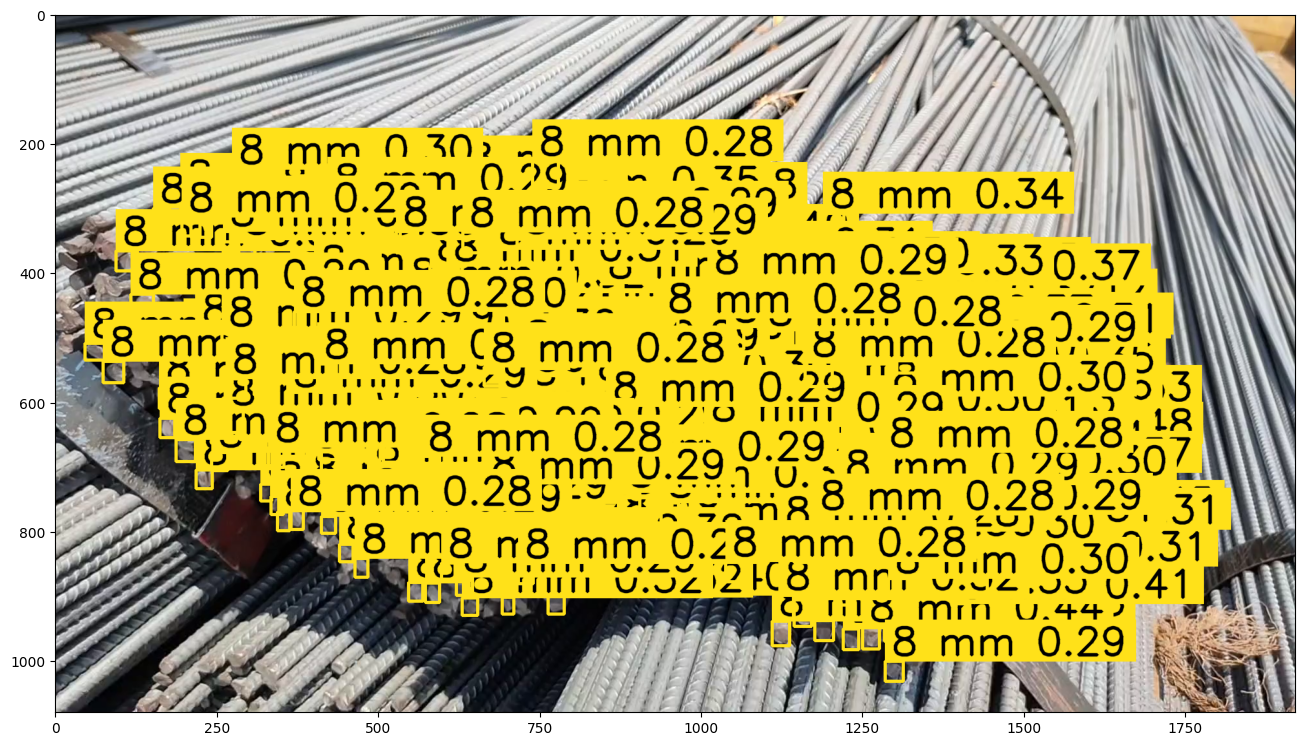

In [ ]:
# create frame generator
generator = get_video_frames_generator("/content/drive/MyDrive/8 mm.mp4")
# create instance of BoxAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# acquire first video frame
iterator = iter(generator)
frame = next(iterator)
# model prediction on single frame and conversion to supervision Detections
results = model(frame)
detections = Detections(
    xyxy=results[0].boxes.xyxy.cpu().numpy(),
    confidence=results[0].boxes.conf.cpu().numpy(),
    class_id=results[0].boxes.cls.cpu().numpy().astype(int)
)
# format custom labels
labels = [
    f"{CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, tracker_id
    in detections
]
# annotate and display frame
frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)

%matplotlib inline
show_frame_in_notebook(frame, (16, 16))

In [ ]:
# settings
LINE_START = Point(50, 750)
LINE_END = Point(2090-50, 750)

TARGET_VIDEO_PATH = f"{HOME}/video result8mm.mp4"

In [ ]:
VideoInfo.from_video_path("/content/drive/MyDrive/8 mm.mp4")

VideoInfo(width=1920, height=1080, fps=30, total_frames=362)

In [ ]:
import cv2
from tqdm.notebook import tqdm


# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path("/content/drive/MyDrive/8 mm.mp4")
# create frame generator
generator = get_video_frames_generator("/content/drive/MyDrive/8 mm.mp4")
# create LineCounter instance
line_counter = LineCounter(start=LINE_START, end=LINE_END)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=4, text_thickness=4, text_scale=2)
# create class count dictionaries to store counts for each class
class_counts = {class_id: 0 for class_id in CLASS_ID}

# Initialize a variable to keep track of the next available ID
next_id = 1

# Create a dictionary to map existing tracker IDs to new consecutive IDs
id_mapping = {}
line_annotator = LineCounterAnnotator(thickness=4, text_thickness=4, text_scale=2)

# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        results = model(frame)
        detections = Detections(
            xyxy=results[0].boxes.xyxy.cpu().numpy(),
            confidence=results[0].boxes.conf.cpu().numpy(),
            class_id=results[0].boxes.cls.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)



        # Update class counts and tracker ID mapping
        for detection, confidence, class_id, tracker_id in detections:
            if class_id in CLASS_ID and tracker_id not in id_mapping.keys():
                class_counts[class_id] += 1
                id_mapping[tracker_id] = next_id
                next_id += 1

        # Create class count labels
        class_count_labels = [
            f"{CLASS_NAMES_DICT[class_id]} Count: {class_counts[class_id]}"
            for class_id in CLASS_ID
        ]

        # annotate the frame with class count labels
        for i, count_label in enumerate(class_count_labels):
            cv2.putText(frame, count_label, (50, 100 + 50*i), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), thickness=2)


        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        # updating line counter
        line_counter.update(detections=detections)
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/362 [00:00<?, ?it/s]


0: 384x640 300 8 mms, 26.4ms
Speed: 3.3ms preprocess, 26.4ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 25.8ms
Speed: 5.2ms preprocess, 25.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 27.5ms
Speed: 3.0ms preprocess, 27.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 26.6ms
Speed: 3.0ms preprocess, 26.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 25.8ms
Speed: 7.5ms preprocess, 25.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 25.8ms
Speed: 3.0ms preprocess, 25.8ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 27.0ms
Speed: 4.3ms preprocess, 27.0ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 300 8 mms, 26.8ms
Speed: 4.3ms preprocess, 26.8ms inference, 1.5ms postprocess per image at shape (